# K-Means Clustering

**Importing Libraries**

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

**Loading the Dataset**

In [15]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Exploring the Data**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [17]:
df.describe()  # Summary statistics

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [18]:
df.isnull().sum()  # Check for missing values

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

- If missing values exist, we need to decide whether to remove or impute them.
- If there are no missing values, we can proceed without imputation.

In [19]:
# Checking duplicate values
print("Duplicate values:", df.duplicated().sum())

Duplicate values: 0


**Data Preprocessing**

In [20]:
# Dropping unnecessary columns
df.drop(['CustomerID', 'Genre', 'Age'], axis=1, inplace=True)
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


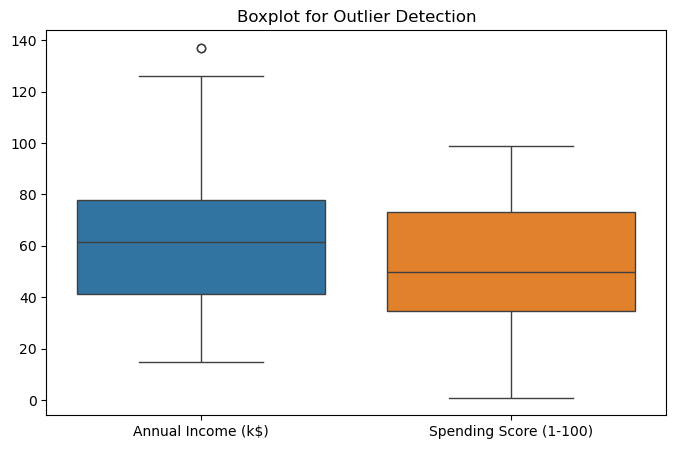

In [21]:
# Checking outliers using boxplots
plt.figure(figsize=(8,5))
sns.boxplot(data=df)
plt.title("Boxplot for Outlier Detection")
plt.show()


- Boxplots help in identifying outliers that may impact clustering.
- If extreme outliers exist, we might consider removing or transforming them.

In [22]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

- Standardization ensures that all features contribute equally to the clustering process.
- This is necessary because K-Means is distance-based, and unscaled features could lead to biased clustering.

**Visualizing Data**

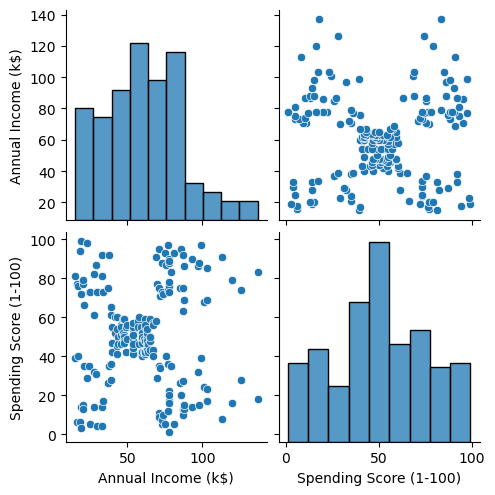

In [23]:
# Pairplot to understand relationships
sns.pairplot(df)
plt.show()

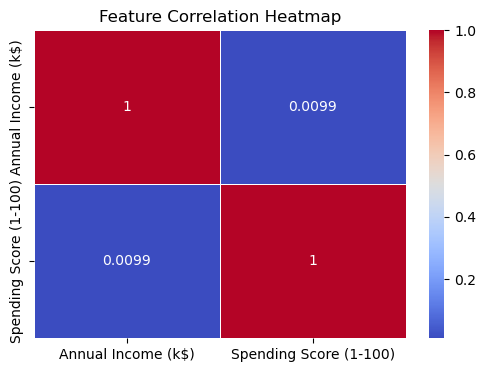

In [24]:
#Heatmap to check correlations
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

**K-Means Clustering: Finding Optimal K (Elbow Method)**

In [25]:
# Selecting relevant features
x=df.iloc[:,:2].values

In [28]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

print(wcss)

[269981.28, 183653.32894736843, 106348.37306211122, 73880.64496247195, 44448.4554479337, 38858.959975143895, 31969.42655023547, 25043.89004329005, 25515.702749961572, 20629.201077666294]


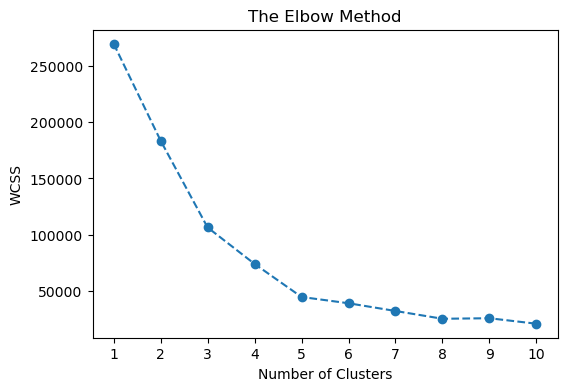

In [29]:
# Plot the Elbow Method result
plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xticks(range(1, 11))
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**Applying K-Means with Optimal K**

In [30]:
kmeans=KMeans(n_clusters=5,init='k-means++')
y_kmeans=kmeans.fit_predict(x)
df['cluster']=pd.DataFrame(y_kmeans)
df.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,3
1,15,81,1
2,16,6,3
3,16,77,1
4,17,40,3


**Visualizing the Clusters**

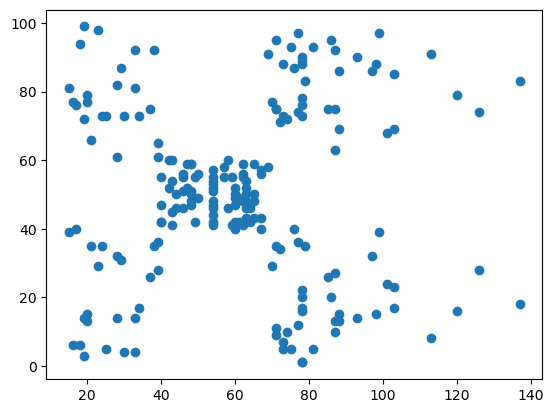

In [31]:
a=df.iloc[:,0]
b=df.iloc[:,1]

plt.scatter(a,b)
plt.show()

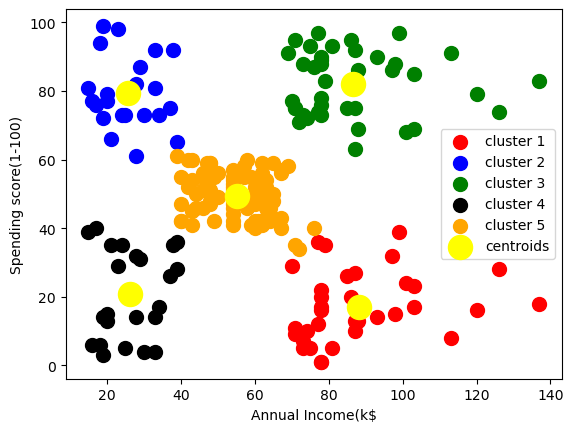

In [32]:
# Scatter plot of clusters
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1],s=100,c='red',label='cluster 1')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],s=100,c='blue',label='cluster 2')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],s=100,c='green',label='cluster 3')
plt.scatter(x[y_kmeans == 3,0],x[y_kmeans == 3,1],s=100,c='black',label='cluster 4')
plt.scatter(x[y_kmeans == 4,0],x[y_kmeans == 4,1],s=100,c='orange',label='cluster 5')

# Plot cluster centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='centroids')
plt.xlabel('Annual Income(k$')
plt.ylabel('Spending score(1-100)')
plt.legend()
plt.show()

**Observations**

- a. High Income, High Spending Score (Cluster (5) Target these customers mall as they are loyal customers. sby sending new product alerts which would lead to increase in the revenue collected by the
- b. High Income, Low Spending Score (Cluster 3) - Target these customers by asking the feedback and advertising the product in a better way to convert them into Cluster 5 customers.
- c. Average Income, Average Spending Score (Cluster 2)- Can target these set of customers by providing them with Low cost EMI's etc.
- d. Low Income, High Spending Score (Cluster 1)-May or may not target these group of customers based on the policy of the mall.
- e. Low Income. Low Spending Score (Cluster 4)-Don't target these customers since they have less income and need to save money.m

- The Elbow Method suggests that 5 clusters are optimal.
- Each cluster represents a different customer segment based on income and spending habits.
- The yellow points indicate the centroids of each cluster.
- This analysis helps in customer segmentation for marketing strategies.

### **Project by : SIREESHA RAGIPATI**